
<img src="https://www.unad.edu.co/images/footer/logo-unad-acreditacion-min.png" width="780" height="140" align="center"/>

<p align="right">Curso: Programación Para el Analisis de datos</p>

<p align="center"> Código Curso: 203008069 </p>

<p align="center"> Grupo: 13 </p>

 <p align="center"> Tarea 2 - Desarrollo de Codigo para el tratamiento y Manejo de la Información</p>

 <p align="center">  Presentado por: Juan José García Sánchez</p>

<p align="center"> Código: 1005095836</p>

 <p align="center"> Tutor(a): Miguel Angel Vargas Valencia </p>

 <p align="center"> 29/10/2024</p>

 <p align="center"> UNIVERSIDAD NACIONAL ABIERTA Y A DISTANCIA </p>



# Importar paquetes de datos relevantes

In [52]:
import pandas as pd 
import numpy as np
from requests import get
import matplotlib.pyplot as plt

# Teoria de APIs

## ¿Qué es REST web service y cómo se utilizan?

REST son las siglas en ingles: *Representational State Transfer*. Es un grupo de especificaciones para el diseño de arquitectura de software, cuyo fin es el de crear sistemas web eficientes, confiables y escalables (MDN, 2023). Estas funcionan median el envio de peticiones en el protocolo HTTP, usando lenguages de programación y librerias para crear las peticiones (MDN, 2023).

## ¿Qué es una RESTful API?

*RESTful* es el nombre que se le da a las APIs que siguen las especificaciones REST (MDN, 2023). Las especificaciones solo se limitan al diseño, por lo que las RESTful APIs pueden ser construidas en principio en cualquier lenguage de programación.

##  ¿Qué es JSON?

Es un formato basado en texto plano, que se usa para la representación y transmision de datos a traves de la web. Su formato se basó en los tipos de dato 'object' de JavaScript, basandose en tipos de datos atomicos (numeros, strings, booleanos) y compuestos (listas); y permitiendo la anidación de estos tipos (MDN, 2024).

# Ejercicio 1: Datos en linea y Tipos de Datos

## Obtencion de datos

Se usa la funcion `get` del paquete requests para enviar una peticion HTTP a la api de spacex. Despues se obtiene el objeto de respuesta y se asigna a la variable *resp* 

In [53]:
url_api_spacex = "https://api.spacexdata.com/v4/ships"

resp = get(url_api_spacex)

In [7]:
resp.json()

[{'last_ais_update': None,
  'legacy_id': 'AMERICANCHAMPION',
  'model': None,
  'type': 'Tug',
  'roles': ['Support Ship', 'Barge Tug'],
  'imo': 7434016,
  'mmsi': 367020820,
  'abs': 571252,
  'class': 7604342,
  'mass_kg': 266712,
  'mass_lbs': 588000,
  'year_built': 1976,
  'home_port': 'Port of Los Angeles',
  'status': '',
  'speed_kn': None,
  'course_deg': None,
  'latitude': None,
  'longitude': None,
  'link': 'https://www.marinetraffic.com/en/ais/details/ships/shipid:434663/mmsi:367020820/imo:7434016/vessel:AMERICAN_CHAMPION',
  'image': 'https://i.imgur.com/woCxpkj.jpg',
  'name': 'American Champion',
  'active': False,
  'launches': ['5eb87cdeffd86e000604b330', '5eb87cdfffd86e000604b331'],
  'id': '5ea6ed2d080df4000697c901'},
 {'last_ais_update': None,
  'legacy_id': 'AMERICANISLANDER',
  'model': None,
  'type': 'Cargo',
  'roles': ['Dragon Recovery'],
  'imo': None,
  'mmsi': 367035570,
  'abs': None,
  'class': None,
  'mass_kg': None,
  'mass_lbs': None,
  'year_buil

Se cargan los datos en un dataframe por medio de el metodo `from_dict` de la clase `DataFrame` de pandas

In [54]:
df_naves = pd.DataFrame.from_dict(resp.json())

## Valores nulos y tipos:

In [55]:
df_naves.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   last_ais_update  0 non-null      object 
 1   legacy_id        22 non-null     object 
 2   model            3 non-null      object 
 3   type             29 non-null     object 
 4   roles            29 non-null     object 
 5   imo              21 non-null     float64
 6   mmsi             24 non-null     float64
 7   abs              18 non-null     float64
 8   class            18 non-null     float64
 9   mass_kg          21 non-null     float64
 10  mass_lbs         21 non-null     float64
 11  year_built       26 non-null     float64
 12  home_port        29 non-null     object 
 13  status           17 non-null     object 
 14  speed_kn         0 non-null      object 
 15  course_deg       0 non-null      object 
 16  latitude         2 non-null      float64
 17  longitude        2

El metodo `info` del dataframe muestra que los tipo de datos contenidos son `floats`, `bools` y `objects`; correspondiendo a variables numericas, binarias y categoricas. El tipo de datos `objects` representa el tipo de dato generico de pandas, y podria ser en realidad `strings`, u otras estructuras de datos más complejas, como diccionarios o listas.

Se puede observar que en los campos `last_ais_updates`, `model`, `speed_kn`, `course_deg`, `latitude`, `latitude` estan vacios o casi vacios. Estas variables tampoco se podrian analizar, por que no se obtuvieron datos.

Los campos `legacy_id`, `imo`, `mmsi`, `abs`, `class`, `mass_kg`, `mass_kg`, `year_built`, `status`, `link`, `image` contienen records con varios valores nulos, pero no son campos vacios. 


## Variables que no se pueden analizar.

El dataset contiene 29 puntos de datos, y 24 campos. De estos campos, no se pueden usar: 

variables simples: `link`, `image`, `legacy_id`, `imo`, `mmsi`, `id`: Los dos primeros campos contienen links para las imagenes de las naves o botes, y links del sitio web marinetraffic.com, que muestra mas información de los barcos, como su locación real. los otros 4 campos son identificadore: `imo` es el identificador dado a las naves por la organización internacional maritima (IMO), `mmsi` es el número de identificación del servicio movil maritimo, `id` es un indicador interno de la API, `legacy_id` es el nombre entendible de las naves. Estos enlaces e identificadores se podrian usar para hacer un scrapeo de datos de las paginas, pero por si mismos no son utiles. 

agregadas: `last_ais_updates`, `roles`, `launches`. Estas variables son agregadas, conteniendo mas información estructurada sobre las naves. Esta información no se puede usar directamente, y debe limpiarse y procesarse para analisis. El campo `last_ais_updates` deberia contener un diccionario u otra estructura de datos conteniendo informacion del sistema automatico de identificion (AIS) de la nave, pero la petición solo devuelve valores `None`, indicando que no estan disponibles. 

## Clasificación:

Las clasificaciones de las variables que se pueden analizar se basaron en: [esquema](https://github.com/r-spacex/SpaceX-API/blob/master/docs/ships/v4/schema.md)

|Variables|Clasificación| Subcategoria |
|---|---|---|
| model | categorica | nominal |
| type | categorica | nominal |
| abs | numerica | discreta |
| class | numerica | discreta |
| mass_kg | numerica | continua |
| mass_lbs | numerica | continua |
| year_built | numerica | discreta |
| home_port | categorica | nominal |
| status | categorica | nominal |
| speed_kn | numerica | continua |
| course_deg | numérica | discreta |
| latitude | numérica | discreta |
| longitude | numérica | discreta |
| active | categorica | binaria |


## Naves activas

In [56]:
activas = df_naves[df_naves["active"]]
print(f"Cantidad de naves en total: {df_naves.shape[0]}")
print(f"Cantidad de naves activas:  {activas.shape[0]}")

Cantidad de naves en total: 29
Cantidad de naves activas:  15


## Distribución de masas

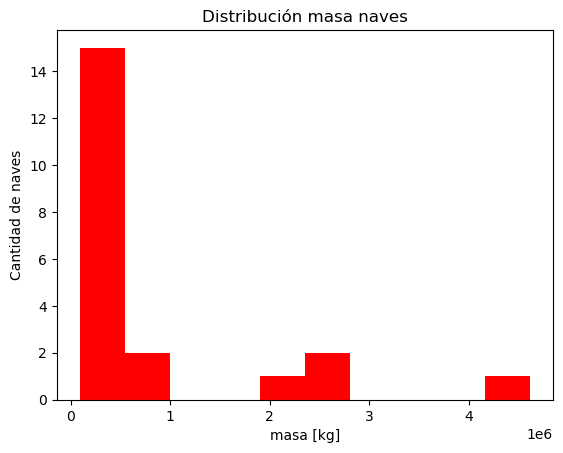

In [57]:
masas = df_naves["mass_kg"].dropna()

plt.hist(masas, color="r")

#ajustando titulos, mostrando leyendas y el grafico
plt.title("Distribución masa naves")

plt.xlabel("masa [kg]")

plt.ylabel("Cantidad de naves")

plt.show()

El histograma de las masas muestra que hay agujeros en la distribución, ya que no hay naves con masas en esas regiones. Tambien se observa que hay pocos barcos con masas grandes mayores a 1 kiloton, y que la mayoria tiene masas menores, entre 0.089 (89 toneladas) y 1 kiloton. Esto muestra que la mayoria de las naves no son masivas.

# Ejercicio 2: Limpieza y procesamiento de datos

## Nuevo dataframe

Se crea un dataframe nuevo que copia las columnas indicadas en una lista: 

In [42]:
df = df_naves[["type", "mass_kg", "year_built", "home_port", "name"]]

In [43]:
df

,type,mass_kg,year_built,home_port,name
0,Tug,266712.0,1976.0,Port of Los Angeles,American Champion
1,Cargo,NaN,NaN,Port of Los Angeles,American Islander
2,Cargo,NaN,NaN,Port of Los Angeles,American Spirit
3,Barge,NaN,2021.0,Port Canaveral,A Shortfall of Gravitas
4,Tug,202302.0,1974.0,Port of Los Angeles,Betty R Gambarella
5,Tug,273063.0,1999.0,Port Canaveral,Elsbeth III
6,High Speed Craft,449964.0,2014.0,Port Canaveral,GO Ms Chief
7,High Speed Craft,449964.0,2015.0,Port Canaveral,GO Ms Tree
8,Cargo,451778.0,2009.0,Port Canaveral,Shannon
9,Cargo,502999.0,2007.0,Port Canaveral,GO Pursuit


## Contando Valores Vacios

El conteo de los valores nulos nos da resultados similares a los obtenidos con el metodo `info`. Se usa el metodo `isna` para encontrar los valores nulos, y se cuentan con `value_counts`. Hay 8 valores nulos en el campo de la masa de las naves. 

In [17]:
df["mass_kg"].isna().value_counts()

mass_kg
False    21
True      8
Name: count, dtype: int64

### Eliminando filas con algunos vacios:

Se eliminan las filas por medio de dos enfoques: eliminando las que tengan solo valores vacios, y eliminando las filas que solo tengan algunos valores vacios. Todos se realiza con el metodo `dropna`, y se observa que no hay filas completamente vacias, mientras que hay 8 filas con algunas columnas vacias. 

In [18]:
df1 = df.dropna()

In [45]:
df1

,type,mass_kg,year_built,home_port,name
0,Tug,266712.0,1976.0,Port of Los Angeles,American Champion
4,Tug,202302.0,1974.0,Port of Los Angeles,Betty R Gambarella
5,Tug,273063.0,1999.0,Port Canaveral,Elsbeth III
6,High Speed Craft,449964.0,2014.0,Port Canaveral,GO Ms Chief
7,High Speed Craft,449964.0,2015.0,Port Canaveral,GO Ms Tree
8,Cargo,451778.0,2009.0,Port Canaveral,Shannon
9,Cargo,502999.0,2007.0,Port Canaveral,GO Pursuit
11,Cargo,450870.0,2010.0,Port Canaveral,Megan
12,Tug,508023.0,1995.0,Port Canaveral,HAWK
13,Tug,320236.0,1985.0,Fort Lauderdale,Hollywood


### Eliminando filas vacias:

In [40]:
df2 = df.dropna(how="all")

In [47]:
df2

,type,mass_kg,year_built,home_port,name
0,tug,266712.0,1976.0,Port of Los Angeles,AMERICAN CHAMPION
1,cargo,NaN,NaN,Port of Los Angeles,AMERICAN ISLANDER
2,cargo,NaN,NaN,Port of Los Angeles,AMERICAN SPIRIT
3,barge,NaN,2021.0,Port Canaveral,A SHORTFALL OF GRAVITAS
4,tug,202302.0,1974.0,Port of Los Angeles,BETTY R GAMBARELLA
5,tug,273063.0,1999.0,Port Canaveral,ELSBETH III
6,high speed craft,449964.0,2014.0,Port Canaveral,GO MS CHIEF
7,high speed craft,449964.0,2015.0,Port Canaveral,GO MS TREE
8,cargo,451778.0,2009.0,Port Canaveral,SHANNON
9,cargo,502999.0,2007.0,Port Canaveral,GO PURSUIT


## Rellenando valores vacios

### rellenando con ceros:

Se rellenan los valores vacios con el metodo `fillna`. Se rellena con ceros en este caso. Este proceso funciona, pero no tendria sentido en el analisis de datos, ya que no tiene sentido tener barcos con masa cero o construidos en el año cero.

In [23]:
df_ceros = df.fillna(0)

In [24]:
df_ceros

,type,mass_kg,year_built,home_port,name
0,Tug,266712.0,1976.0,Port of Los Angeles,American Champion
1,Cargo,0.0,0.0,Port of Los Angeles,American Islander
2,Cargo,0.0,0.0,Port of Los Angeles,American Spirit
3,Barge,0.0,2021.0,Port Canaveral,A Shortfall of Gravitas
4,Tug,202302.0,1974.0,Port of Los Angeles,Betty R Gambarella
5,Tug,273063.0,1999.0,Port Canaveral,Elsbeth III
6,High Speed Craft,449964.0,2014.0,Port Canaveral,GO Ms Chief
7,High Speed Craft,449964.0,2015.0,Port Canaveral,GO Ms Tree
8,Cargo,451778.0,2009.0,Port Canaveral,Shannon
9,Cargo,502999.0,2007.0,Port Canaveral,GO Pursuit


### rellenando con propagación:

Se rellena con propacion hacia adelante, con el metodo `ffill`, que copian en las celdas vacias los valores en las filas anteriores que esten mas cerca. Este método no deja los valores en cero, pero tampoco tiene sentido, ya que el método de propagación funciona mejor cuando se habla de cambios de variables en el tiempo o respecto a otras variables. En esto caso, las filas no representan cambios, sino diferentes elementos, por lo que el método no aplicaria.


In [26]:
df_prop = df.ffill()

In [27]:
df_prop

,type,mass_kg,year_built,home_port,name
0,Tug,266712.0,1976.0,Port of Los Angeles,American Champion
1,Cargo,266712.0,1976.0,Port of Los Angeles,American Islander
2,Cargo,266712.0,1976.0,Port of Los Angeles,American Spirit
3,Barge,266712.0,2021.0,Port Canaveral,A Shortfall of Gravitas
4,Tug,202302.0,1974.0,Port of Los Angeles,Betty R Gambarella
5,Tug,273063.0,1999.0,Port Canaveral,Elsbeth III
6,High Speed Craft,449964.0,2014.0,Port Canaveral,GO Ms Chief
7,High Speed Craft,449964.0,2015.0,Port Canaveral,GO Ms Tree
8,Cargo,451778.0,2009.0,Port Canaveral,Shannon
9,Cargo,502999.0,2007.0,Port Canaveral,GO Pursuit


### rellenando con promedios:

Para poder rellenar, primero se rellenan con ceros las celdas vacias y se calculan los promedios de las columnas de interes, y luego se usa el metodo `fillna` con el dataframe resultante. En este caso, tiene mas sentido rellenar el valor del campo de masa con los promedios, pero no tiene tanto sentido rellenar el año con el promedio de años de construcción. 

En el caso de la masa, considero que se debe hacer un promedio ponderado, donde los valores mas frecuentes (que son los valores menores) tengan mayor influencia, y rellenar con el promedio calculado. En el caso de la fecha, calcular cual es la fecha minima del dataset y rellenar con esa fecha. De esta forma se tiene, por lo menos, un limite inferior de cuando se podria haber construido la nave.

In [28]:
pros = df[["mass_kg","year_built"]].fillna(0).mean()

In [29]:
pros

mass_kg       663917.241379
year_built      1791.724138
dtype: float64

In [30]:
df_prom = df.fillna(pros)

In [48]:
df_prom

,type,mass_kg,year_built,home_port,name
0,Tug,2.667120e+05,1976.000000,Port of Los Angeles,American Champion
1,Cargo,6.639172e+05,1791.724138,Port of Los Angeles,American Islander
2,Cargo,6.639172e+05,1791.724138,Port of Los Angeles,American Spirit
3,Barge,6.639172e+05,2021.000000,Port Canaveral,A Shortfall of Gravitas
4,Tug,2.023020e+05,1974.000000,Port of Los Angeles,Betty R Gambarella
5,Tug,2.730630e+05,1999.000000,Port Canaveral,Elsbeth III
6,High Speed Craft,4.499640e+05,2014.000000,Port Canaveral,GO Ms Chief
7,High Speed Craft,4.499640e+05,2015.000000,Port Canaveral,GO Ms Tree
8,Cargo,4.517780e+05,2009.000000,Port Canaveral,Shannon
9,Cargo,5.029990e+05,2007.000000,Port Canaveral,GO Pursuit


## Manipulación de Strings

En todos los ejercicios siguientes, el atributo `str` permite realizar operaciones con strings vectorizadas, sobre las filas o columnas, estando soportadas todas las operaciones de python.

### Extraer y Contar primera palabras:

En este caso, se realiza una separación del string por medio de los espacios. Se obtienen listas en todas las celdas del campo, y se selecciona el primer elemento, que sera la primera palabra de cada campo. El metodo `value_counts` permite contabilizar las palabras, encontrandose que 28 elementos usan "Port", mientras que solo hay uno con "Fort".

In [32]:
primera_home_port = df["home_port"].str.split(" ").str[0]

display(primera_home_port)

primera_home_port.value_counts()


0     Port
1     Port
2     Port
3     Port
4     Port
5     Port
6     Port
7     Port
8     Port
9     Port
10    Port
11    Port
12    Port
13    Fort
14    Port
15    Port
16    Port
17    Port
18    Port
19    Port
20    Port
21    Port
22    Port
23    Port
24    Port
25    Port
26    Port
27    Port
28    Port
Name: home_port, dtype: object

home_port
Port    28
Fort     1
Name: count, dtype: int64

### Filtrar entradas que contengan "GO":

El metodo `contains` devuelve `True` cuando el string evaluado contiene el string de prueba. En este caso, se encuentran todos los indices que contengan "GO" en la columna "name", y se extraen las filas completas del dataframe.

In [33]:
df[df["name"].str.contains("GO")]

,type,mass_kg,year_built,home_port,name
6,High Speed Craft,449964.0,2014.0,Port Canaveral,GO Ms Chief
7,High Speed Craft,449964.0,2015.0,Port Canaveral,GO Ms Tree
9,Cargo,502999.0,2007.0,Port Canaveral,GO Pursuit
10,Cargo,NaN,2014.0,Port Canaveral,GO Quest


### Capitalizando los nombres:

El metodo upper transforma en letras mayusculas a todas las celdas del campo `name`.

In [34]:
df.loc[:,"name"] = df["name"].str.upper()

In [35]:
df

,type,mass_kg,year_built,home_port,name
0,Tug,266712.0,1976.0,Port of Los Angeles,AMERICAN CHAMPION
1,Cargo,NaN,NaN,Port of Los Angeles,AMERICAN ISLANDER
2,Cargo,NaN,NaN,Port of Los Angeles,AMERICAN SPIRIT
3,Barge,NaN,2021.0,Port Canaveral,A SHORTFALL OF GRAVITAS
4,Tug,202302.0,1974.0,Port of Los Angeles,BETTY R GAMBARELLA
5,Tug,273063.0,1999.0,Port Canaveral,ELSBETH III
6,High Speed Craft,449964.0,2014.0,Port Canaveral,GO MS CHIEF
7,High Speed Craft,449964.0,2015.0,Port Canaveral,GO MS TREE
8,Cargo,451778.0,2009.0,Port Canaveral,SHANNON
9,Cargo,502999.0,2007.0,Port Canaveral,GO PURSUIT


### Descapitalizando el campo type:

El metodo `lower` transforma todas las letras de la celdas en letras minusculas.

In [36]:
df.loc[:,"type"] = df["type"].str.lower()

In [37]:
df

,type,mass_kg,year_built,home_port,name
0,tug,266712.0,1976.0,Port of Los Angeles,AMERICAN CHAMPION
1,cargo,NaN,NaN,Port of Los Angeles,AMERICAN ISLANDER
2,cargo,NaN,NaN,Port of Los Angeles,AMERICAN SPIRIT
3,barge,NaN,2021.0,Port Canaveral,A SHORTFALL OF GRAVITAS
4,tug,202302.0,1974.0,Port of Los Angeles,BETTY R GAMBARELLA
5,tug,273063.0,1999.0,Port Canaveral,ELSBETH III
6,high speed craft,449964.0,2014.0,Port Canaveral,GO MS CHIEF
7,high speed craft,449964.0,2015.0,Port Canaveral,GO MS TREE
8,cargo,451778.0,2009.0,Port Canaveral,SHANNON
9,cargo,502999.0,2007.0,Port Canaveral,GO PURSUIT


### Partir strings por el espacio:

El metodo `split` que tienen todas las cadenas de texto en python, permite partir la cadena en el caracter o caracteres dados, y obtener una lista con los elementos. En el caso del dataframe, la columna completa es transformada, y contiene listas con las partes de la cadena que separaban los espacios.

In [53]:
df.loc[:,"home_port"] = df["home_port"].str.split()

In [54]:
df

,type,mass_kg,year_built,home_port,name
0,tug,266712.0,1976.0,"[Port, of, Los, Angeles]",AMERICAN CHAMPION
1,cargo,NaN,NaN,"[Port, of, Los, Angeles]",AMERICAN ISLANDER
2,cargo,NaN,NaN,"[Port, of, Los, Angeles]",AMERICAN SPIRIT
3,barge,NaN,2021.0,"[Port, Canaveral]",A SHORTFALL OF GRAVITAS
4,tug,202302.0,1974.0,"[Port, of, Los, Angeles]",BETTY R GAMBARELLA
5,tug,273063.0,1999.0,"[Port, Canaveral]",ELSBETH III
6,high speed craft,449964.0,2014.0,"[Port, Canaveral]",GO MS CHIEF
7,high speed craft,449964.0,2015.0,"[Port, Canaveral]",GO MS TREE
8,cargo,451778.0,2009.0,"[Port, Canaveral]",SHANNON
9,cargo,502999.0,2007.0,"[Port, Canaveral]",GO PURSUIT


### Reemplazos palabra "Port"

Se usa el metodo `replace`, para reemplazar las partes que coincidan, con un valor de reemplazo. En este caso, se reemplaza complemtamente "Port" por "P"

In [38]:
df["home_port"].str.replace("Port", "P")

0     P of Los Angeles
1     P of Los Angeles
2     P of Los Angeles
3          P Canaveral
4     P of Los Angeles
5          P Canaveral
6          P Canaveral
7          P Canaveral
8          P Canaveral
9          P Canaveral
10         P Canaveral
11         P Canaveral
12         P Canaveral
13     Fort Lauderdale
14         P Canaveral
15         P Canaveral
16    P of Los Angeles
17    P of Los Angeles
18    P of Los Angeles
19    P of Los Angeles
20    P of Los Angeles
21         P Canaveral
22         P Canaveral
23         P Canaveral
24         P Canaveral
25         P Canaveral
26         P Canaveral
27         P Canaveral
28         P Canaveral
Name: home_port, dtype: object

## Posilibilidades:

Los metodos presentados de strings son basicos en cualquier programación de aplicaciones, en los cuales se requiera trabajar con texto. En el caso de la ciencia de datos, los métodos son completamente necesarios, ya que generalmente se trabaja con respuestas de formularios o encuestas, variables categoricas, procesamiento del lenguage natural, etc. Todas estas aplicaciones incluyen manipulación del texto, con el proposito de hacerlo más uniforme y procesable para el analisis.

# Ejercicio 3: Agregación, unión y Concatenación de DataFrames

## Carga de bases de datos

In [113]:
# cargando datos de los pesos de estudiantes 1
df_estudiante: pd.DataFrame = pd.read_csv("Anexo 1 - Student Weight Status.csv")


In [74]:
df_estudiante.head(20)

,LOCATION CODE,COUNTY,AREA NAME,REGION,SCHOOL YEARS,NO. OVERWEIGHT,PCT OVERWEIGHT,NO. OBESE,PCT OBESE,NO. OVERWEIGHT OR OBESE,PCT OVERWEIGHT OR OBESE,GRADE LEVEL,AREA TYPE,STREET ADDRESS,CITY,STATE,ZIP CODE,LATITUDE,LONGITUDE,Location 1
0,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2010-2012,575.0,18.4,565.0,18.1,1140.0,36.5,ELEMENTARY,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2010-2012,380.0,19.4,416.0,21.3,796.0,40.7,MIDDLE/HIGH,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2012-2014,873.0,17.2,994.0,19.6,1867.0,36.9,DISTRICT TOTAL,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2012-2014,551.0,17.2,571.0,17.8,1122.0,35.0,ELEMENTARY,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2012-2014,292.0,16.0,413.0,22.6,705.0,38.6,MIDDLE/HIGH,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2014-2016,926.0,17.6,1028.0,19.5,1954.0,37.2,DISTRICT TOTAL,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2014-2016,515.0,16.7,520.0,16.8,1035.0,33.5,ELEMENTARY,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2014-2016,404.0,18.9,494.0,23.1,898.0,42.1,MIDDLE/HIGH,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2016-2018,775.0,17.0,921.0,20.2,1696.0,37.1,DISTRICT TOTAL,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,4,CATTARAUGUS,CATTARAUGUS,WESTERN NEW YORK,2016-2018,499.0,16.6,554.0,18.5,1053.0,35.1,ELEMENTARY,COUNTY,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Fusionando Datos

Los datos se pueden fusionar de dos formas a un dataframe: se pueden agreagar a los records o los campo. En este caso, se van a adjuntar a los records de un dataframe, usando la función `concat` del paquete de pandas. Se crean a continuación los dataframes que se van a usar para las fusiones:

In [59]:
p1 = df_estudiante.loc[0:1, ["AREA NAME", "COUNTY"]]
p2 = df_estudiante.loc[2:4, ["AREA NAME", "COUNTY"]]

In [60]:
display(p1, p2)

,AREA NAME,COUNTY
0,CATTARAUGUS,CATTARAUGUS
1,CATTARAUGUS,CATTARAUGUS


,AREA NAME,COUNTY
2,CATTARAUGUS,CATTARAUGUS
3,CATTARAUGUS,CATTARAUGUS
4,CATTARAUGUS,CATTARAUGUS


### Concatenación sin llaves

In [61]:
pd.concat((p1, p2))

,AREA NAME,COUNTY
0,CATTARAUGUS,CATTARAUGUS
1,CATTARAUGUS,CATTARAUGUS
2,CATTARAUGUS,CATTARAUGUS
3,CATTARAUGUS,CATTARAUGUS
4,CATTARAUGUS,CATTARAUGUS


### Concatenación con llaves

In [65]:
concatenado_llaves = pd.concat((p1, p2), keys=("p1", "p2"))
display(concatenado_llaves)

AREA NAME       COUNTY
p1 0  CATTARAUGUS  CATTARAUGUS
   1  CATTARAUGUS  CATTARAUGUS
p2 2  CATTARAUGUS  CATTARAUGUS
   3  CATTARAUGUS  CATTARAUGUS
   4  CATTARAUGUS  CATTARAUGUS

### Mostrando datos p1

In [67]:
datos_p1 = concatenado_llaves.loc["p1"]

display(datos_p1)

,AREA NAME,COUNTY
0,CATTARAUGUS,CATTARAUGUS
1,CATTARAUGUS,CATTARAUGUS


Se observa que `concat` se puede usar para concatenar los dataframes por los records. La diferencia respecto al parametro `keys`, es que sin usarlo los dataframes se concatenan y forman una nueva unidad. Especificando `keys`, se agregan indices con nombres para cada dataframe. Estos indices se pueden usar con el metodo `loc` para obtener los dataframes originales. 

La concatenación por si misma es util, en los casos en los cuales se requieran combinar varios datasets, o en los casos donde se requiera procesar o limpiar datos, y se necesiten como una sola entidad. El parametro `keys` agrega la posiblidad de poder recuperar los datasets como eran antes de la concatenación. Esto tambien es un caso muy frecuente en el análisis de datos, sirviendo por ejemplo en los casos de analisis en el tiempo donde se deseen marcar intervalos de tiempo y usarlos individualmente, o en casos donde se deseen poder idenficar diferentes muestras de un conjunto completo de datos.

## Agregando Datos

Para agregar los datos, se pueden usar las operaciones logicas de python, que son soportadas por los dataframes. En todos los casos, las expresiones resultantes de usar `==`, `&`, `|` y `~` son arrays que contiene valores **True** o **False** (unos y ceros). Estos siempre se usan para indexar en el dataframe original

In [89]:
estudiantes_primaria = df_estudiante[df_estudiante["GRADE LEVEL"] == "ELEMENTARY"]

estudiantes_obesos = estudiantes_primaria["NO. OBESE"]

print("Estadisticas Estudiantes OBESOS:")

display(estudiantes_obesos.describe())

Estadisticas Estudiantes OBESOS:


count     2795.000000
mean       275.786762
std       2021.124815
min          5.000000
25%         26.000000
50%         52.000000
75%        108.000000
max      49140.000000
Name: NO. OBESE, dtype: float64

Se calcula que el conjunto de escuelas tiene un promedio de 2795 estudiantes obesos, una escuela tiene el minimo global de 5 estudiantes, y otra tiene el maximo global de 49140 estudiantes. Se tiene una desviación estandar de 2021.12, que es alta. Observando los cuartiles, se puede ver que hay iguales distancias entre primero-segundo y segundo-tercero, sugiriendo que la distribución es simetrica, y la mayoria de los datos se situan bajo los cientos de estudiantes obesos. Sin embargo, el maximo supera por mucho al tecer cuartil, lo que muestra que deben de haber outliers.

In [120]:
escuelas_delaware = estudiantes_primaria[estudiantes_primaria["COUNTY"] == "DELAWARE"]

print("Escuelas en Delaware:")

display(escuelas_delaware.shape[0])

Escuelas en Delaware:


52

Se observa para agrupar los datos que compartan elementos comunes, se deben usar los operadores logicos en los dataframes de pandas.
se usa el operador `==` para obtener un dataframe con las escuelas primarias primero, se calculan estadisticos de resumen, y luego se usa otra vez el dataframe para encontrar todas las que este en el condado de Delaware. Para el ultimo caso tambien se podria haber usado el operador `&` en el datframe original de escuelas, pero se esta reusando el anterior resultado.

Las tecnicas de agrupación, usando los operadores, son utiles para filtrar los datos, y son necesarias para poder enfocar el analisis en variables especificas, o realizar calculos sin involucrar otras caracteristicas del dataset.

## Uniendo Datos

La union de dataframes es similar a la concatenación ya mostrada, pero es más flexible. Se realiza con la funcion `merge`, o con el metodo `join`, y permite realizar uniones sobre las columnas, con la posibilidad de aplicar elegir de que dataframe se conservan las filas. Esto se realiza eligiendo filas donde los valores de las columnas especificadas sean iguales, usando la misma dinamica de la busqueda de llaves en un diccionario de python.

### Creando dataframe grade_lookup y Series filas

In [134]:
grade_lookup = pd.DataFrame({
    "GRADE LEVEL" : ["ELEMENTARY", "MIDDLE/HIGH", "MISC"],
    "level": [1, 2, 3]
})

display(grade_lookup)

,GRADE LEVEL,level
0,ELEMENTARY,1
1,MIDDLE/HIGH,2
2,MISC,3


In [129]:
filas = df_estudiante["GRADE LEVEL"].head(5)
filas.head()

0        ELEMENTARY
1       MIDDLE/HIGH
2    DISTRICT TOTAL
3        ELEMENTARY
4       MIDDLE/HIGH
Name: GRADE LEVEL, dtype: object

### Inner Join:

La forma de unir `inner join` hace referencia a la operación de conjuntos de la **Intersección**. En la columna especificada, se toman las filas que tengan valores en comun en ambas estructuras de datos, y se descartan los demas. Se puede observar en la columna *"GRADE LEVEL"* que se descarto la fila con indice 2 de grade_lookup, ya que no aparece *"DISTRICT TOTAL"*. La columna "level" se rellena con los numeros correspondientes que tuvieran el indice correspondiente a los valores siendo unidos en *"GRADE LEVEL"*.

In [131]:
pd.merge(filas, grade_lookup, on="GRADE LEVEL", how="inner")

,GRADE LEVEL,level
0,ELEMENTARY,1
1,MIDDLE/HIGH,2
2,ELEMENTARY,1
3,MIDDLE/HIGH,2


### Left Join:

La forma unir `left join` hace que solo se tomen en cuenta los valores de la primera estructura de datos para hacer la union. Se puede observar en el resultado que, como en el dataframe de grade_lookup no ha valores de *"DISTRICT TOTAL"* en la columna *"GRADE LEVEL"*, no se puede asignar un valor para ese caso, por lo que la columna *level* tiene un *NaN* en el lugar correspondiente.

In [132]:
pd.merge(filas, grade_lookup, on="GRADE LEVEL", how="left")

,GRADE LEVEL,level
0,ELEMENTARY,1.0
1,MIDDLE/HIGH,2.0
2,DISTRICT TOTAL,NaN
3,ELEMENTARY,1.0
4,MIDDLE/HIGH,2.0


### Outer Join:

La forma de unir `outer join` hace referencia a la operación de conjuntos de la **Union**. Se toman los valores de ambas estructuras de datos, en la columna especificada para hacer la unión, sin importar que no coincidan. Todas los valores de ambas estrucutras aparecen en la columna *"GRADE LEVEL"*. Esto causa un valor *NaN* en la columna *level* ya que no hay valor correspondiente en esa columna a *"DISTRIC TOTAL"*.

In [135]:
pd.merge(filas, grade_lookup, on="GRADE LEVEL", how="outer")

,GRADE LEVEL,level
0,DISTRICT TOTAL,NaN
1,ELEMENTARY,1.0
2,ELEMENTARY,1.0
3,MIDDLE/HIGH,2.0
4,MIDDLE/HIGH,2.0
5,MISC,3.0


Los métodos para poder hacer uniones entre dataframes es bastante util en el analisis de datos, ya que nos brinda mas flexiblidad para crear dataframes mas especializados, y poder analizarlos. Usos potenciales podrian ser la limpieza de datos, conservando solo aquellos que coincidan con un dataframe patrón, como en los ejemplos; otro uso puede ser el de usar dataframes como bases de datos, y aprovechar sus operaciones para hacer consultas y modificaciones a datasets.

## Agrupando Datos

Las agrupaciones de los datos se realizan mediante el método `groupby`, que permite crear nuevos conjuntos de datos, usando los valores de las filas. El criterio de agrupación puede ser una columna, un grupo de columnas o algun otro método especializado, que se indica por una función. Se devuelve un objeto de agrupación sin procesar, que luego se debe consumir, ya sea transformandolo en un dataframe u otra estructura de datos.

### Distribución de estudiantes obesos, por tipo de escuela

En este caso, se indico al método que debe agrupar por la columna *"GRADE LEVEL"*. Esto devuelve un objeto que tiene la misma interfas de un dataframe, y que tiene indices de filas iguales a los valores de la columna por la cual se esta agrupando, en este caso: *"DISTRICT TOTAL"*, *"ELEMENTARY"*, *"MIDDLE/HIGH"*

In [140]:
grupo_obesos = df_estudiante.groupby("GRADE LEVEL")

El objeto agrupador se consume en el siguiente fragmento de codigo. Se utiliza el metodo `agg` para hallar simultaneamente la suma de datos, el promedio y la desviación estandar. Los resultados se muestran en un dataframe, donde los campos son los estadisticos buscados,  y los indices son los valores que se usaron para agrupar los datos.

In [147]:
grupo_obesos["NO. OBESE"].agg((
    "sum",
    "mean",
    "std"))

,sum,mean,std
GRADE LEVEL,,,
DISTRICT TOTAL,1359576.0,473.719861,3502.973168
ELEMENTARY,770824.0,275.786762,2021.124815
MIDDLE/HIGH,577812.0,215.039821,1532.055998


Los metodos de agrupaciones son una alternativa mas poderosa que los operadores logicos para agrupar los datos, ya que no solamente se pueden usar las comparaciones entre valores, tambien se pueden especificar funciones para criteros mas complejos. En el analisis de datos, se puede usar para hacer analisis bidimensional estadistico entre variables, o para probar correlaciones. El proceso de agrupación facilitaria la selección de las variables relevantes para usarlas como input en analisis estadisticos.

# Referencias

- Kane, F. (2017). Hands-On Data Science and Python Machine Learning. Packt
- MDN contributors. (2024). Trabajando con JSON. MDN Web Docs. https://developer.mozilla.org/es/docs/Learn/JavaScript/Objects/JSON
- MDN contributors. (2023). REST. MDN Web Docs. https://developer.mozilla.org/en-US/docs/Glossary/REST
- Thakur, A. (2016). Python: Real-World Data Science. Packt Publishing. (pp. 199 - 220).
